In [1]:
from MFDFA import MFDFA
import csv
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import glob as gl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
import cv2

SinEpilepcia = gl.glob(r"D:\Usuario\OneDrive\Escritorio\Uni\Pasantia\PacienteSin*.EDF")
ConEpilepcia = gl.glob(r"D:\Usuario\OneDrive\Escritorio\Uni\Pasantia\PacienteCon*.EDF") 


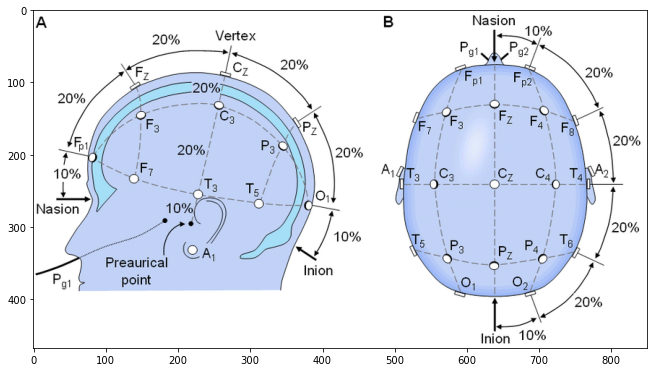

In [2]:
"""
CANALES:

'Fp1-Ref' 1
 'F3-Ref' 2
 'C3-Ref' 3
 'P3-Ref' 4
 'O1-Ref' 5
 'F7-Ref' 6
 'T3-Ref' 7
 'T5-Ref' 8
 'A1-Ref' 9
 'Fp2-Ref'10
 'F4-Ref' 11
 'C4-Ref' 12
 'P4-Ref' 13
 'O2-Ref' 14
 'F8-Ref' 15
 'T4-Ref' 16
 'T6-Ref' 17
 'A2-Ref' 18
 'Fz-Ref' 19
 'Cz-Ref' 20
 'Pz-Ref' 21
 
""";


# creating a object
imagen = r'D:\Usuario\OneDrive\Escritorio\Uni\Proyecto final de carrera\MultiFractal\Figura-3-Sistema-Internacional-10-20-para-la-colocacion-de-los-electrodos.png'
img = cv2.imread(imagen)
plt.figure(figsize=(11,11))
plt.imshow(img)



In [3]:
        
lag = np.unique(np.logspace(6, 14, 11, base = 2).astype(int))
start = -20
stop = 20
num = abs(start) + stop + 1
qo = np.linspace(start,stop,num)
q = []
for dato in qo:
    if dato != 0:
        q.append(dato)

order = 1

In [4]:
H = []
Hs = []
for j in range(len(SinEpilepcia)):
    H = []
    f = pyedflib.EdfReader(SinEpilepcia[j])
    n = f.signals_in_file
    
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((17, f.getNSamples()[0]))
    sigbufs[0, :] = (f.readSignal(0)-f.readSignal(1)) #Fp1-F3
    sigbufs[1, :] = (f.readSignal(1)-f.readSignal(2)) #F3-C3
    sigbufs[2, :] =(f.readSignal(2)-f.readSignal(3)) #C3-P3
    sigbufs[3, :] =(f.readSignal(3)-f.readSignal(4)) #P3-O1
    sigbufs[4, :] =(f.readSignal(0)-f.readSignal(5)) #Fp1-F7
    sigbufs[5, :] =(f.readSignal(5)-f.readSignal(6)) #F7-T3
    sigbufs[6, :] =(f.readSignal(6)-f.readSignal(7)) #T3-T5
    sigbufs[7, :] =(f.readSignal(7)-f.readSignal(4)) #T5-O1
    sigbufs[8, :] =(f.readSignal(19)) #Cz-Ref
    sigbufs[9, :] =(f.readSignal(9)-f.readSignal(10)) #Fp2-F4
    sigbufs[10, :] =(f.readSignal(10)-f.readSignal(11)) #F4-C4
    sigbufs[11, :] =(f.readSignal(11)-f.readSignal(12)) #C4-P4
    sigbufs[12, :] =(f.readSignal(12)-f.readSignal(13)) #P4-O2
    sigbufs[13, :] =(f.readSignal(9)-f.readSignal(14)) #Fp2-F8
    sigbufs[14, :] =(f.readSignal(14)-f.readSignal(15)) #F8-T4
    sigbufs[15, :] =(f.readSignal(15)-f.readSignal(16)) #T4-T6
    sigbufs[16, :] =(f.readSignal(16)-f.readSignal(4)) #T6-O1

        
    for canal in range(17):    
        sigbufsdif = []

        
        #DAT = np.cumsum(np.cumsum(sigbufs[canal, 1400:]))
        #DAT = np.cumsum(sigbufs[canal, 1400:])
        DAT = sigbufs[canal, 1600:]
        lag, dfa = MFDFA(np.asarray(DAT), lag = lag, q = q, order = order)
        Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]
        H.append(Ho)
    Hs.append(H)        

In [5]:

H = []
Hc = []
for j in range(len(ConEpilepcia)):
    H = []
    f = pyedflib.EdfReader(ConEpilepcia[j])
    n = f.signals_in_file
    
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((17, f.getNSamples()[0]))
    
    sigbufs[0, :] = (f.readSignal(0)-f.readSignal(1)) #Fp1-F3
    sigbufs[1, :] = (f.readSignal(1)-f.readSignal(2)) #F3-C3
    sigbufs[2, :] =(f.readSignal(2)-f.readSignal(3)) #C3-P3
    sigbufs[3, :] =(f.readSignal(3)-f.readSignal(4)) #P3-O1
    sigbufs[4, :] =(f.readSignal(0)-f.readSignal(5)) #Fp1-F7
    sigbufs[5, :] =(f.readSignal(5)-f.readSignal(6)) #F7-T3
    sigbufs[6, :] =(f.readSignal(6)-f.readSignal(7)) #T3-T5
    sigbufs[7, :] =(f.readSignal(7)-f.readSignal(4)) #T5-O1
    sigbufs[8, :] =(f.readSignal(19)) #Cz-Ref
    sigbufs[9, :] =(f.readSignal(9)-f.readSignal(10)) #Fp2-F4
    sigbufs[10, :] =(f.readSignal(10)-f.readSignal(11)) #F4-C4
    sigbufs[11, :] =(f.readSignal(11)-f.readSignal(12)) #C4-P4
    sigbufs[12, :] =(f.readSignal(12)-f.readSignal(13)) #P4-O2
    sigbufs[13, :] =(f.readSignal(9)-f.readSignal(14)) #Fp2-F8
    sigbufs[14, :] =(f.readSignal(14)-f.readSignal(15)) #F8-T4
    sigbufs[15, :] =(f.readSignal(15)-f.readSignal(16)) #T4-T6
    sigbufs[16, :] =(f.readSignal(16)-f.readSignal(4)) #T6-O1
        
    for canal in range(17):    
        sigbufsdif = []

        

        #DAT = np.cumsum(np.cumsum(sigbufs[canal, 1400:]))
        #%DAT = np.cumsum(sigbufs[canal, 1400:])
        DAT = sigbufs[canal, 1400:]
        lag, dfa = MFDFA(np.asarray(DAT), lag = lag, q = q, order = order)
        Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]
        H.append(Ho)
    Hc.append(H)     

C:\Users\valen\anaconda3\lib\site-packages\MFDFA\MFDFA.py:249: RuntimeWarning: divide by zero encountered in float_power
  np.mean(np.float_power(F, q / 2), axis=1),
<ipython-input-5-c19f97e7a8d0>:38: RuntimeWarning: divide by zero encountered in log
  Ho = np.polyfit(np.log(lag),np.log(dfa),1)[0]


In [6]:
Hc[7]


[array([0.71916182, 0.7171465 , 0.71493927, 0.71251348, 0.70983771,
        0.7068747 , 0.70358016, 0.69990168, 0.69577812, 0.69114103,
        0.68592082, 0.68006365, 0.67356863, 0.66655613, 0.65936484,
        0.65263961, 0.64736824, 0.64508005, 0.6493915 , 0.67240169,
        0.72301338, 0.58579111, 0.51341266, 0.47292796, 0.44710948,
        0.42920727, 0.41601334, 0.40581922, 0.39764673, 0.39090345,
        0.3852126 , 0.38032386, 0.37606433, 0.37231033, 0.36897074,
        0.36597653, 0.36327428, 0.36082174, 0.3585849 , 0.35653602]),
 array([0.67319833, 0.67057402, 0.66767716, 0.66446621, 0.66089197,
        0.65689634, 0.65241139, 0.64735921, 0.64165413, 0.63520972,
        0.62795617, 0.6198773 , 0.61107942, 0.60189744, 0.59301019,
        0.5854983 , 0.58083142, 0.58095026, 0.58877092, 0.60964194,
        0.6437416 , 0.56680567, 0.51419302, 0.47882568, 0.45321497,
        0.43381468, 0.41860149, 0.40633693, 0.39623062, 0.3877579 ,
        0.38055646, 0.37436655, 0.36899578, 0.

<IPython.core.display.Javascript object>


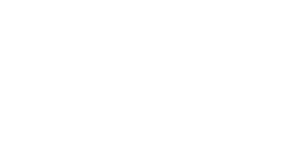

Text(0, 0.5, 'h(q)')

In [7]:
%matplotlib notebook
canal = 12

#Canal 5  Escala 6, 13



for j in range(len(Hs)):  # recorro todas las pruebas
    plt.plot(q,Hs[j][canal],'b')




for j in range(len(Hc)):  # recorro todas las pruebas
    plt.plot(q,Hc[j][canal],'r')

plt.grid()
plt.xlabel("q")
plt.ylabel("h(q)")

<IPython.core.display.Javascript object>


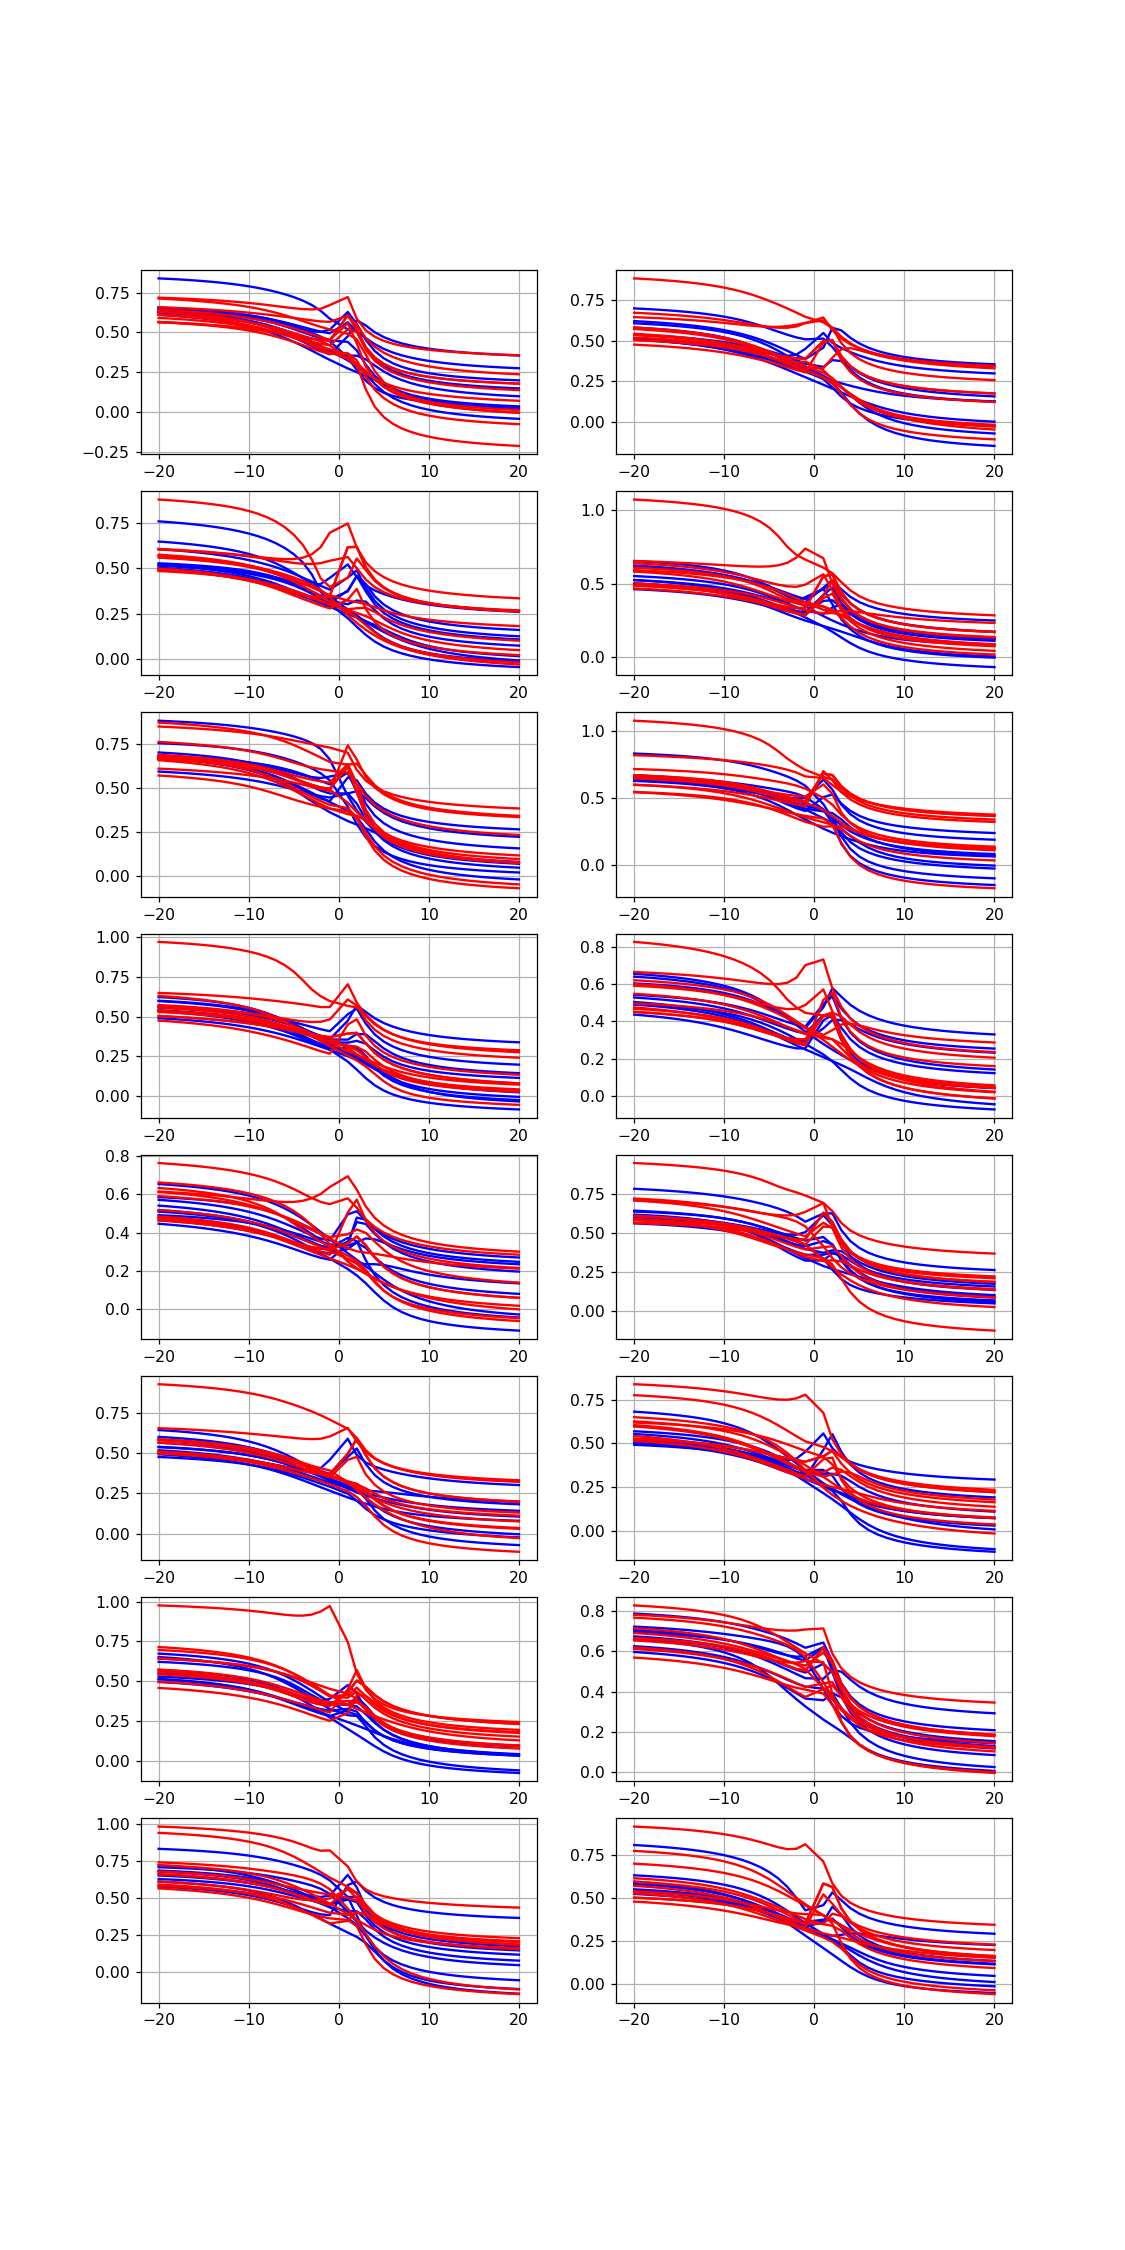

In [8]:
%matplotlib notebook
fig, axs = plt.subplots(8, 2, figsize = (10,20))
canal = 0
for i in range(8):
    for k in range(2):
        for j in range(len(Hs)):  # recorro todas las pruebas
            axs[i, k].plot(q,Hs[j][canal],'b')
            axs[i, k].grid()
        canal = canal + 1
       
canal = 0
for i in range(8):
    for k in range(2):
        for j in range(len(Hc)):  # recorro todas las pruebas
            axs[i, k].plot(q,Hc[j][canal],'r')
            axs[i, k].grid()
        canal = canal + 1
       



In [9]:
#Mediciones
canal = 15
sig = 0
anchoH = Hs[sig][canal][0]- (Hs[sig][canal][-1])
Q = int(len(q)/2 + 1)
HDFA = H[sig][Q]
QenCero = (H[sig][int(len(q)/2)-1] + H[sig][int(len(q)/2)])/2
QenCero
Q
anchoH

0.3898099456220989

In [10]:
def promedio(arreglo):
    return sum(arreglo) / len(arreglo)

def isNaN(num):
    return num != num

<IPython.core.display.Javascript object>


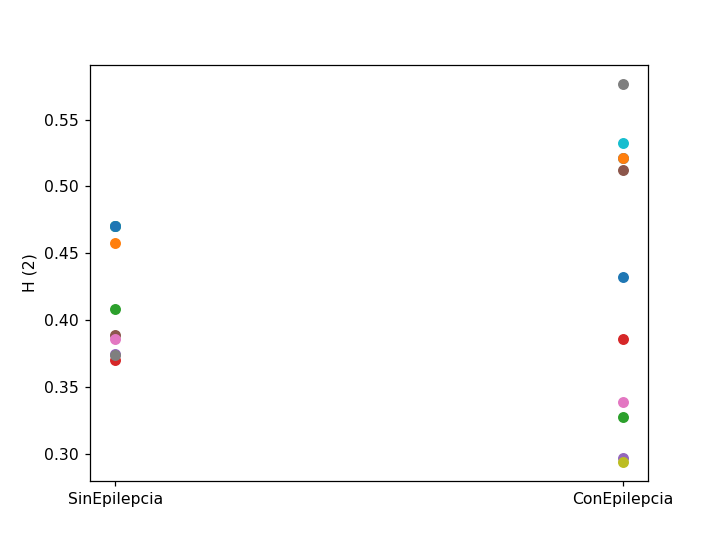

Text(0, 0.5, 'H (2)')

In [11]:
Q = int(len(q)/2 + 1)


HDFAs = []
HDFAc = []
Proms = []
Promc = []
canalf = 0
sig = 0
for sig in range(9):
    for canalf in range(16):
        if np.isnan(Hs[sig][canalf][Q]) == False:
            Proms.append(Hs[sig][canalf][Q])
    HDFAs.append(promedio(Proms))
    Promc = [] 
canalf = 0
sig = 0
for sig in range(12):
    for canalf in range(16):
        if np.isnan(Hc[sig][canalf][Q]) == False:
            Promc.append(Hc[sig][canalf][Q])
    if len(Promc)!=0:
        HDFAc.append(promedio(Promc))  
    Promc = []     
    
#HDFAc = np.delete(HDFAc, 3)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
HurstS = HDFAs
HurstC = HDFAc

x = ["SinEpilepcia", "ConEpilepcia"]
y0 = [HurstS[0],HurstC[0]]
y1 = [HurstS[1],HurstC[1]]
y2 = [HurstS[2],HurstC[2]]
y3 = [HurstS[3],HurstC[3]]
y4 = [HurstS[4],HurstC[4]]
y5 = [HurstS[5],HurstC[5]]
y6 = [HurstS[6],HurstC[6]]
y7 = [HurstS[7],HurstC[7]]
y8 = [HurstS[0],HurstC[8]]
y9 = [HurstS[0],HurstC[9]]
y10 = [HurstS[0],HurstC[10]]



fig, ax = plt.subplots()
er0 = ax.errorbar(x, y0,marker="o", linestyle="none")
er1 = ax.errorbar(x, y1,marker="o", linestyle="none")
er2 = ax.errorbar(x, y2,marker="o", linestyle="none")
er3 = ax.errorbar(x, y3,marker="o", linestyle="none")
er4 = ax.errorbar(x, y4,marker="o", linestyle="none")
er5 = ax.errorbar(x, y5,marker="o", linestyle="none")
er6 = ax.errorbar(x, y6,marker="o", linestyle="none")
er7 = ax.errorbar(x, y7,marker="o", linestyle="none")
er8 = ax.errorbar(x, y8,marker="o", linestyle="none")
er9 = ax.errorbar(x, y9,marker="o", linestyle="none")
er10 = ax.errorbar(x, y10,marker="o", linestyle="none")




plt.ylabel('H (2)')


In [12]:
from numpy import var
#HurstC.pop(5)
varCon = var(HurstC)
varSin = var(HurstS)
print(varCon)
print(varSin)


0.010214007735667115
0.001331290154932457


<IPython.core.display.Javascript object>


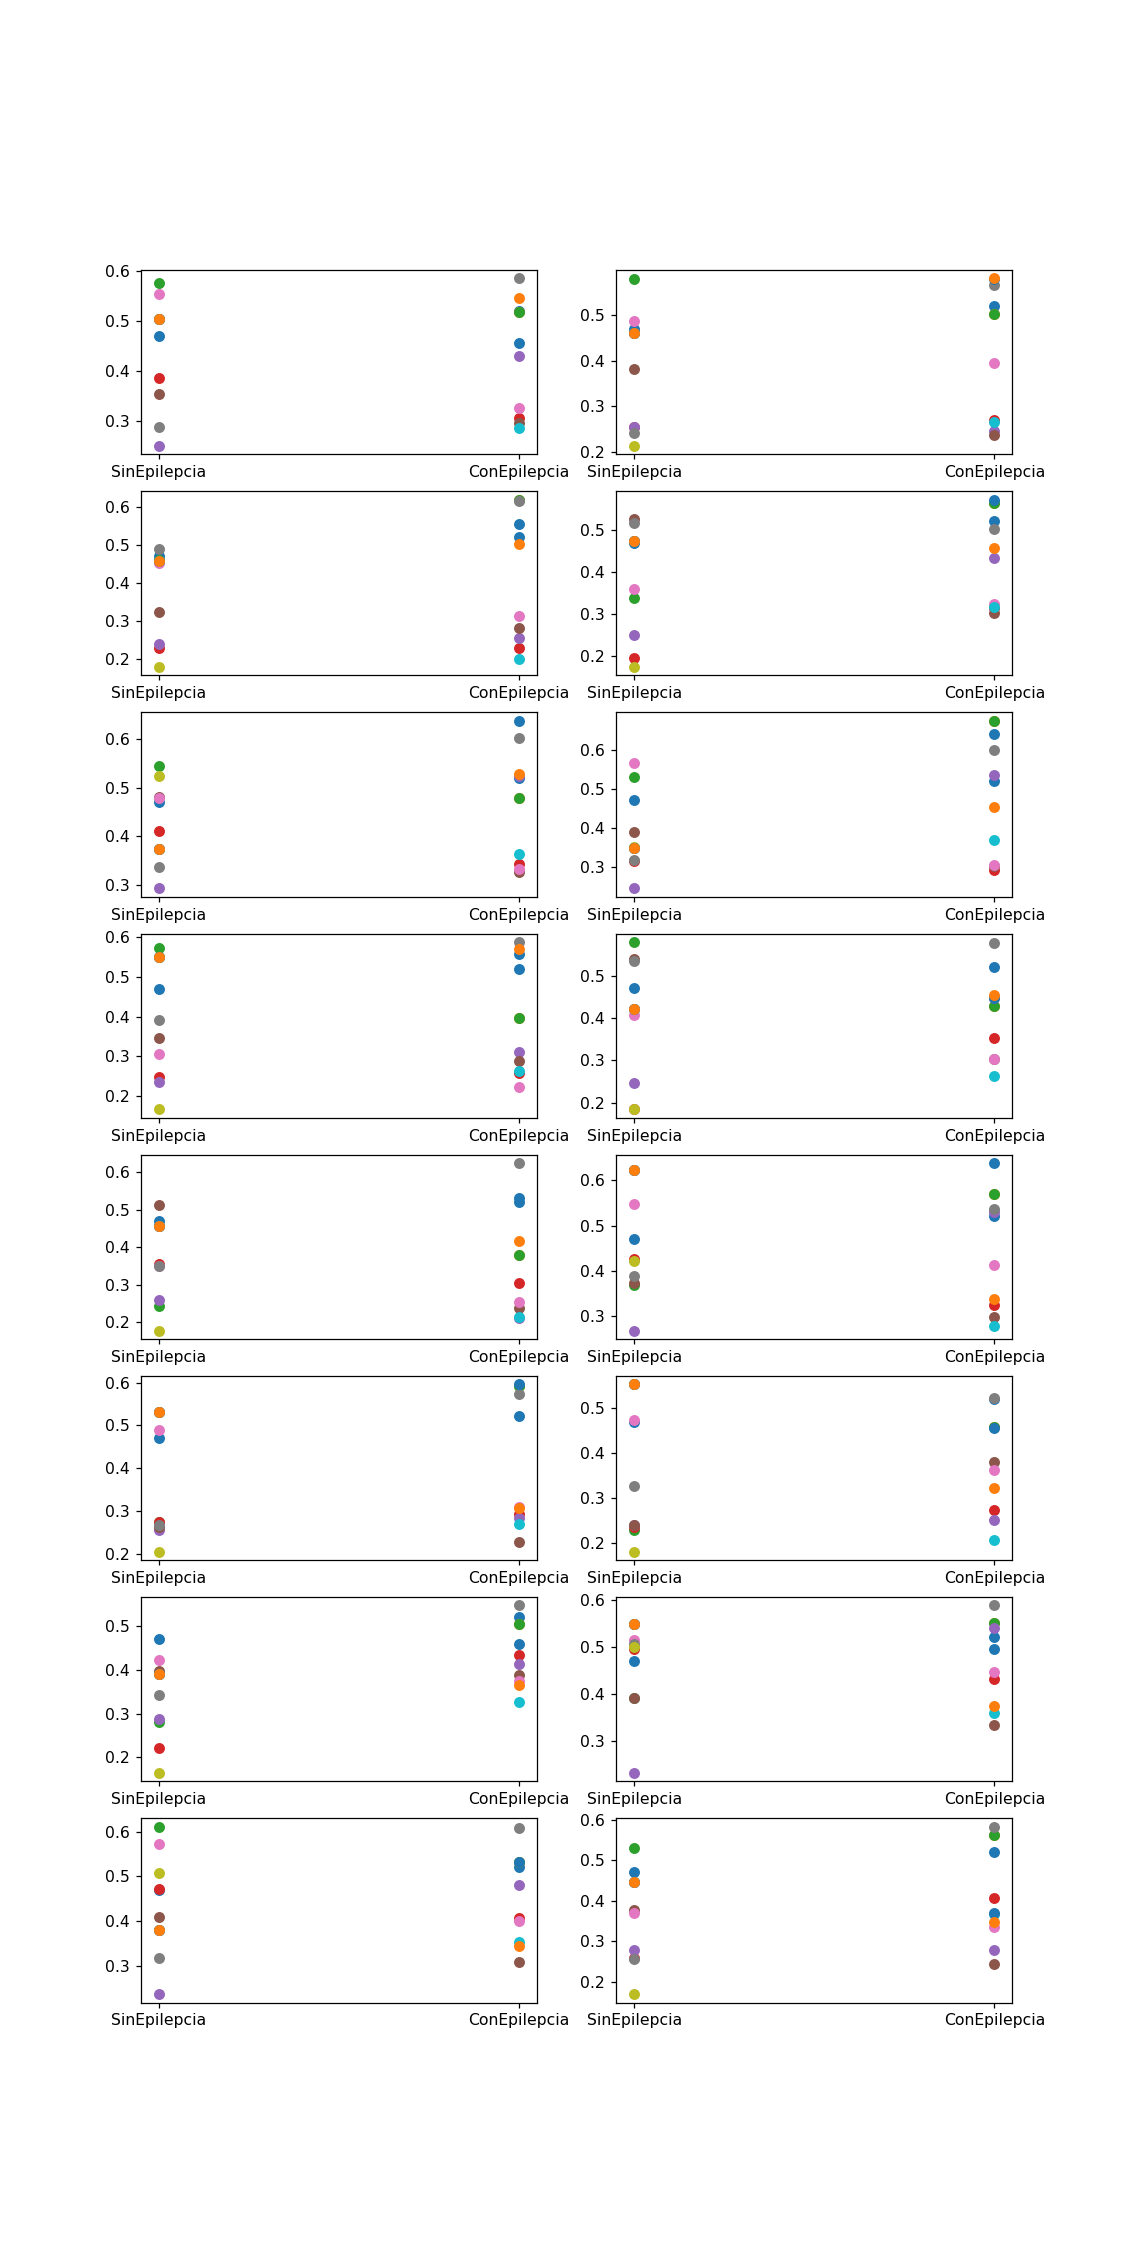

In [13]:
Q = int(len(q)/2 + 1)
HDFAsCanal = []
HDFAcCanal = []

canalf = 0


fig, ax = plt.subplots(8, 2, figsize = (10,20))

for i in range(8):
    for k in range(2):
        HDFAsCanal = []
        HDFAcCanal = []
        sig = 0
        for sig in range(len(SinEpilepcia)):
            HDFAsCanal.append(Hs[sig][canalf][Q])

        sig = 0
        for sig in range(len(ConEpilepcia)):
            HDFAcCanal.append(Hc[sig][canalf][Q]) 

        HurstS = HDFAsCanal
        HurstC = HDFAcCanal
        HurstC.pop(5) 
        x = ["SinEpilepcia", "ConEpilepcia"]

        y1 = [HurstS[0],HurstC[0]]
        y2 = [HurstS[1],HurstC[1]]
        y3 = [HurstS[2],HurstC[2]]
        y4 = [HurstS[3],HurstC[3]]
        y5 = [HurstS[4],HurstC[4]]
        y6 = [HurstS[5],HurstC[5]]
        y7 = [HurstS[6],HurstC[6]]
        y8 = [HurstS[7],HurstC[7]]
        y9 = [HurstS[0],HurstC[8]]
        y10 = [HurstS[0],HurstC[9]]
        y11 = [HurstS[0],HurstC[10]]
        #y12 = [HurstS[0],HurstC[11]]
        
        ax[i, k].errorbar(x, y0,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y1,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y2,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y3,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y4,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y5,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y6,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y7,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y8,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y9,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y10,marker="o", linestyle="none")
        ax[i, k].errorbar(x, y11,marker="o", linestyle="none")
        
        canalf = canalf + 1




In [14]:
Promc

[]

<IPython.core.display.Javascript object>


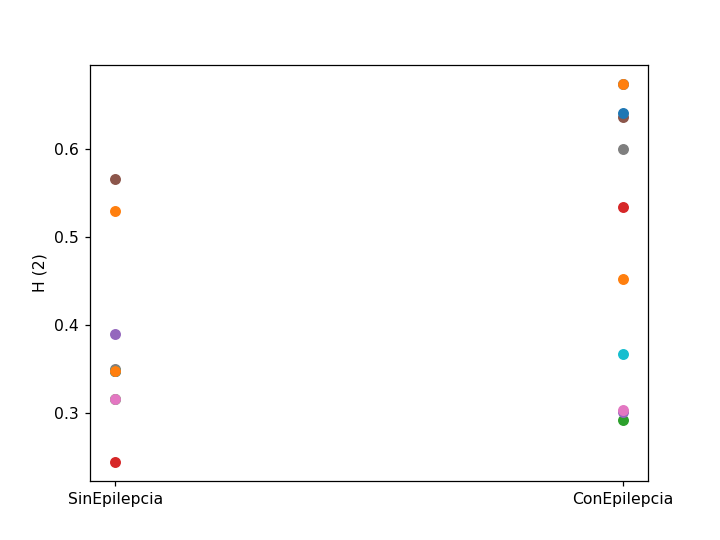

Text(0, 0.5, 'H (2)')

In [15]:
Q = int(len(q)/2 + 1)
HDFAsCanal = []
HDFAcCanal = []

canalf =5


sig = 0
for sig in range(len(SinEpilepcia)):
    HDFAsCanal.append(Hs[sig][canalf][Q])
sig = 0
for sig in range(len(ConEpilepcia)):
    HDFAcCanal.append(Hc[sig][canalf][Q])    
HurstS = HDFAsCanal
HurstC = HDFAcCanal
x = ["SinEpilepcia", "ConEpilepcia"]
y1 = [HurstS[0],HurstC[0]]
y2 = [HurstS[1],HurstC[1]]
y3 = [HurstS[2],HurstC[2]]
y4 = [HurstS[3],HurstC[3]]
y5 = [HurstS[4],HurstC[4]]
y6 = [HurstS[5],HurstC[5]]
y7 = [HurstS[6],HurstC[6]]
y8 = [HurstS[7],HurstC[7]]
y9 = [HurstS[0],HurstC[8]]
y10 = [HurstS[0],HurstC[9]]
y11 = [HurstS[0],HurstC[10]]
y12 = [HurstS[0],HurstC[11]]

        
fig, ax = plt.subplots()
er1 = ax.errorbar(x, y1,marker="o", linestyle="none")
er2 = ax.errorbar(x, y2,marker="o", linestyle="none")
er3 = ax.errorbar(x, y3,marker="o", linestyle="none")
er4 = ax.errorbar(x, y4,marker="o", linestyle="none")
er5 = ax.errorbar(x, y5,marker="o", linestyle="none")
er6 = ax.errorbar(x, y6,marker="o", linestyle="none")
er7 = ax.errorbar(x, y7,marker="o", linestyle="none")
er8 = ax.errorbar(x, y8,marker="o", linestyle="none")
er9 = ax.errorbar(x, y9,marker="o", linestyle="none")
er10 = ax.errorbar(x, y10,marker="o", linestyle="none")
er11 = ax.errorbar(x, y11,marker="o", linestyle="none")
er12 = ax.errorbar(x, y12,marker="o", linestyle="none")

plt.ylabel('H (2)')

In [16]:
HurstC = np.delete(HurstC, 8)
varCon = var(HurstC)
varSin = var(HurstS)
print(varCon)
print(varSin)

0.02279639246439412
0.009546455803819293


<IPython.core.display.Javascript object>


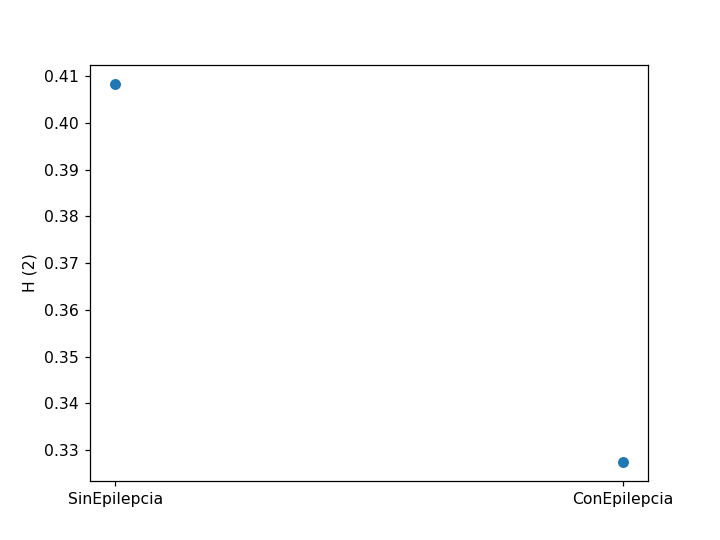

Text(0, 0.5, 'H (2)')

In [17]:
Q = int(len(q)/2 + 1)


HDFAs = []
HDFAc = []
Proms = []
Promc = []
canalf = 0
sig = 0
for sig in range(8):
    for canalf in range(16):
        if np.isnan(Hs[sig][canalf][Q]) == False:
            Proms.append(Hs[sig][canalf][Q])
    HDFAs.append(promedio(Proms))
    Promc = [] 
canalf = 0
sig = 0
for sig in range(11):
    for canalf in range(16):
        if np.isnan(Hc[sig][canalf][Q]) == False:
            Promc.append(Hc[sig][canalf][Q])
    if len(Promc)!=0:
        HDFAc.append(promedio(Promc))  
    Promc = []     
    
#HDFAc = np.delete(HDFAc, 3)
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
HurstS = HDFAs
HurstC = HDFAc

x = ["SinEpilepcia", "ConEpilepcia"]
y0 = [HurstS[2],HurstC[2]]

fig, ax = plt.subplots()
er0 = ax.errorbar(x, y0,marker="o", linestyle="none")

plt.ylabel('H (2)')


In [18]:
print(HurstC[9])
print(HurstS[7])

0.5328045879335047
0.3736637211576676


<IPython.core.display.Javascript object>


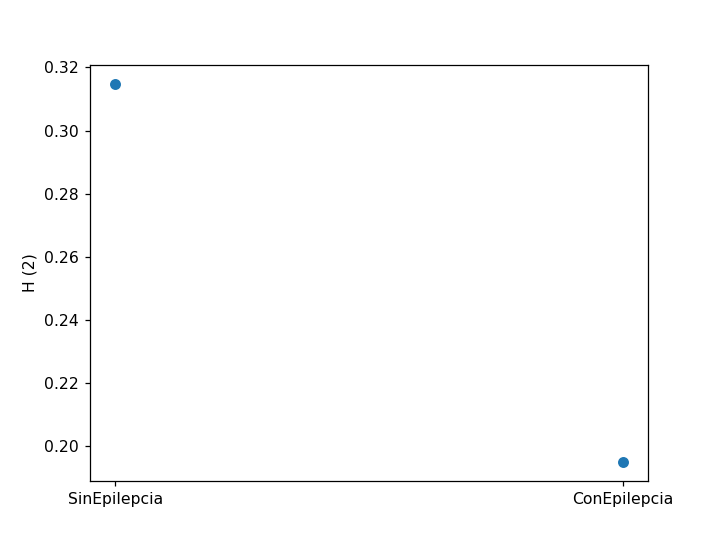

Text(0, 0.5, 'H (2)')

In [19]:
Q = int(len(q)/2 + 1)


HDFAs = []
HDFAc = []

canalf = 3
sig = 0
for sig in range(8):

    if np.isnan(Hs[sig][canalf][Q]) == False:
            HDFAc.append(Hs[sig][canalf][Q])


sig = 0
for sig in range(11):

    if np.isnan(Hc[sig][canalf][Q]) == False:
            HDFAs.append(Hc[sig][canalf][Q])  
            
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
HurstS = HDFAs
HurstC = HDFAc

x = ["SinEpilepcia", "ConEpilepcia"]
y0 = [HurstS[2],HurstC[2]]

fig, ax = plt.subplots()
er0 = ax.errorbar(x, y0,marker="o", linestyle="none")

plt.ylabel('H (2)')


<IPython.core.display.Javascript object>


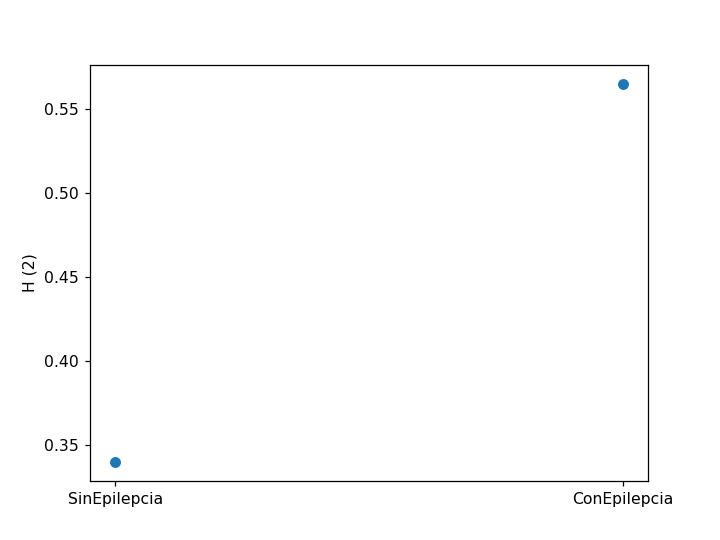

Text(0, 0.5, 'H (2)')

In [20]:
Q = int(len(q)/2 + 1)
HDFAsCanals = []
HDFAcCanals = []

canalf = 3

sig = 0
for sig in range(len(SinEpilepcia)):
    HDFAsCanals.append(Hs[sig][canalf][Q])
sig = 0
for sig in range(len(ConEpilepcia)):
    HDFAcCanals.append(Hc[sig][canalf][Q])    
HurstSCa = HDFAsCanals
HurstCCa = HDFAcCanals
x = ["SinEpilepcia", "ConEpilepcia"]

y3 = [HurstSCa[1],HurstCCa[1]]


        
fig, ax = plt.subplots()
er2 = ax.errorbar(x, y3,marker="o", linestyle="none")


plt.ylabel('H (2)')

In [21]:
print(HurstCCa[1])
print(HurstSCa[1])

0.5649939232821334
0.3398845501436669
